# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C://Users//SANDEEP YADAV//Desktop//Major2Poject//employee_data.csv', delimiter=',')

In [3]:
data.head()

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
name                      14998 non-null object
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_projects           14999 non-null int64
average_monthly_hours     14999 non-null int64
time_spent_company        14999 non-null int64
work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5_years    14999 non-null int64
department                14999 non-null object
salary                    14999 non-null object
salary_level              14999 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 1.4+ MB


In [6]:
data.isnull().values.any()

True

In [7]:
data.apply(lambda x: sum(x.isnull()))

name                      1
satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
salary_level              0
dtype: int64

In [8]:
data[data['left']==1].shape[0]    # Number of employees that left

3571

In [9]:
data[data['left']==0].shape[0]    # Number of employees that are still working there

11428

In [10]:
group_a = data[data['left']==1].mean()    # Divide working employees and those who left in different groups
print(group_a)

satisfaction_level          0.440098
last_evaluation             0.718113
number_projects             3.855503
average_monthly_hours     207.419210
time_spent_company          3.876505
work_accident               0.047326
left                        1.000000
promotion_last_5_years      0.005321
salary_level                1.414730
dtype: float64


In [11]:
group_b = data[data['left']==0].mean()    # Divide working employees and those who do not left in different groups
print(group_b)

satisfaction_level          0.666810
last_evaluation             0.715473
number_projects             3.786664
average_monthly_hours     199.060203
time_spent_company          3.380032
work_accident               0.175009
left                        0.000000
promotion_last_5_years      0.026251
salary_level                1.650945
dtype: float64


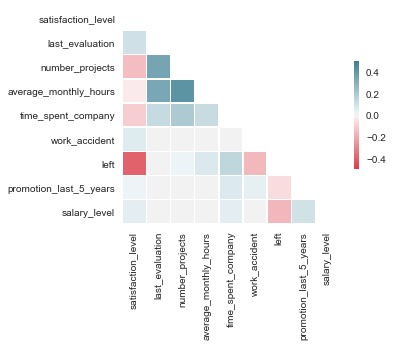

In [12]:
sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

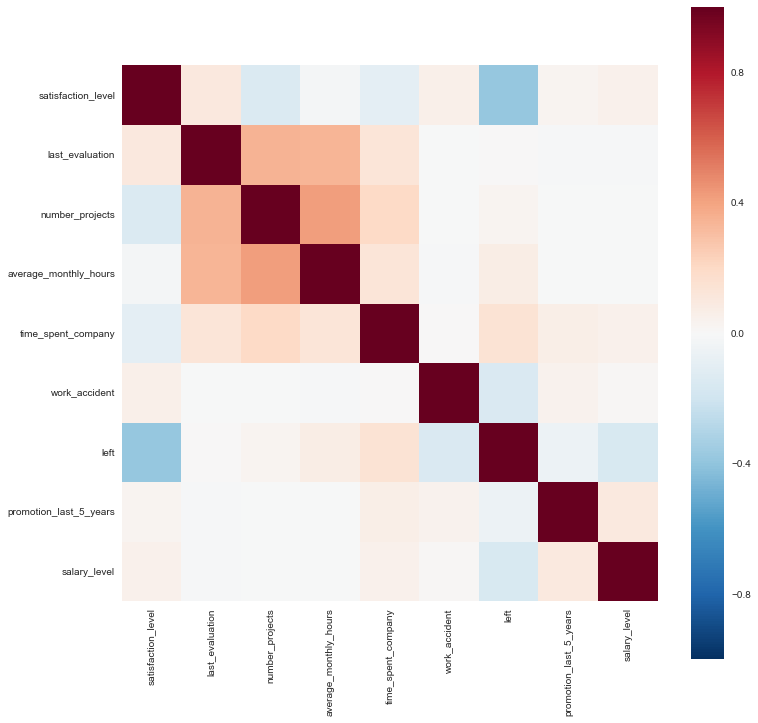

In [13]:
# Creating the heatmap of correlation matrix
corr = data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True)
plt.show()

In [14]:
corr # Printing the correlation matrix

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spent_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5_years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary_level,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


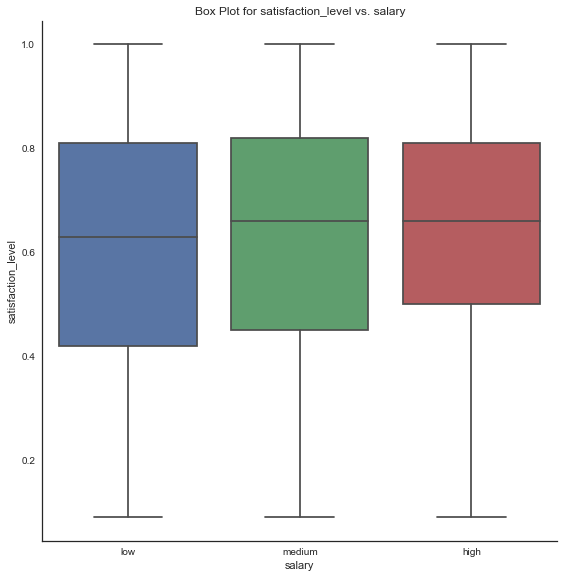

In [15]:
sns.factorplot(data=data, x='salary', y='satisfaction_level', kind='box', size=8)
plt.title('Box Plot for satisfaction_level vs. salary')
plt.show()

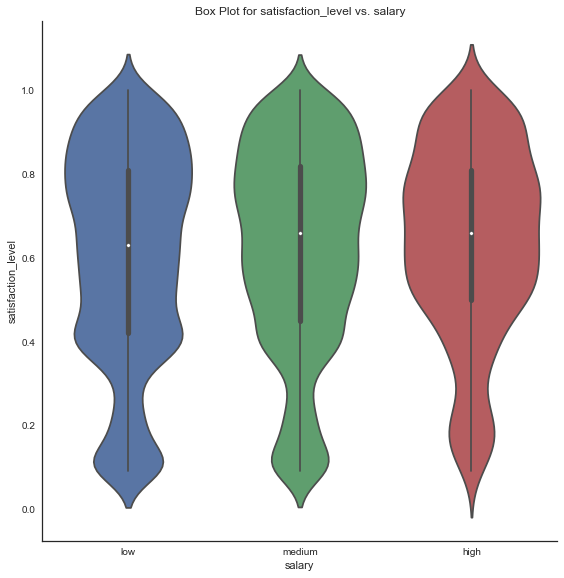

In [16]:
sns.factorplot(data=data, x='salary', y='satisfaction_level', kind='violin', size=8)
plt.title('Box Plot for satisfaction_level vs. salary')
plt.show()

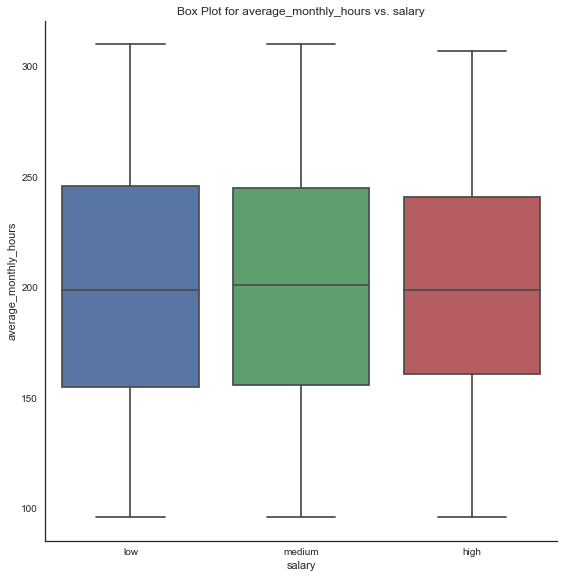

In [17]:
sns.factorplot(data=data, x='salary', y='average_monthly_hours', kind='box', size=8)
plt.title('Box Plot for average_monthly_hours vs. salary')
plt.show()

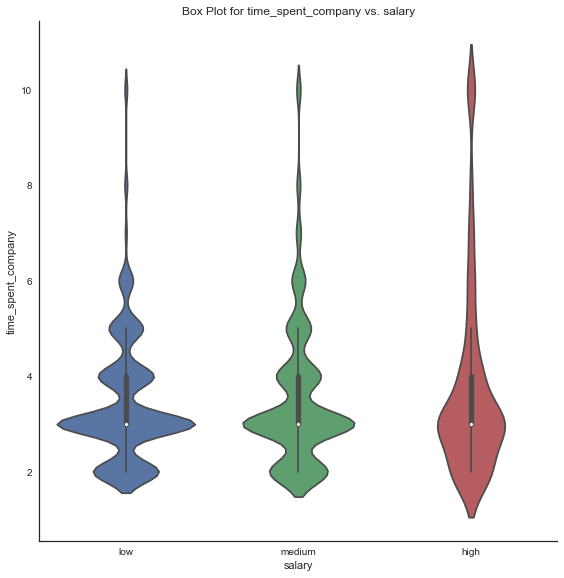

In [18]:
sns.factorplot(data=data, x='salary', y='time_spent_company', kind='violin', size=8)
plt.title('Box Plot for time_spent_company vs. salary')
plt.show()

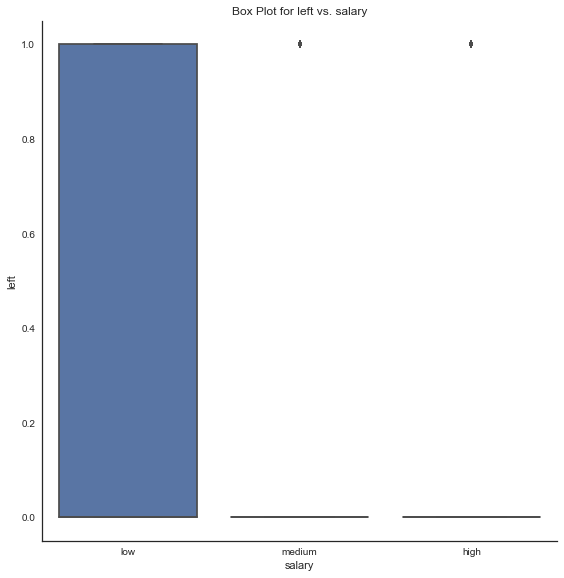

In [19]:
sns.factorplot(data=data, x='salary', y='left', kind='box', size=8)
plt.title('Box Plot for left vs. salary')
plt.show()

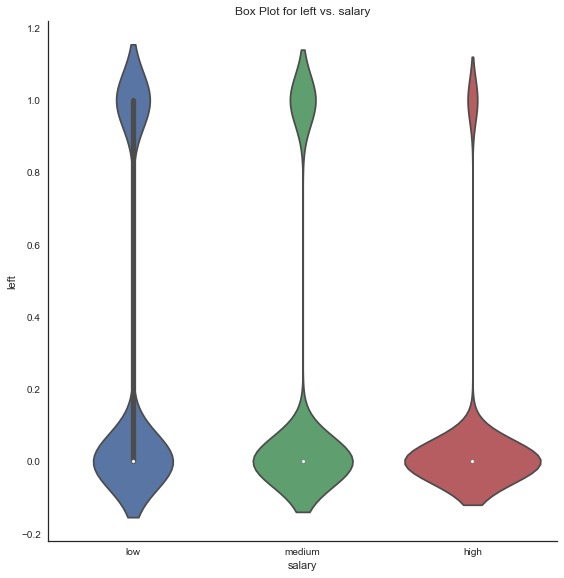

In [20]:
sns.factorplot(data=data, x='salary', y='left', kind='violin', size=8)
plt.title('Box Plot for left vs. salary')
plt.show()

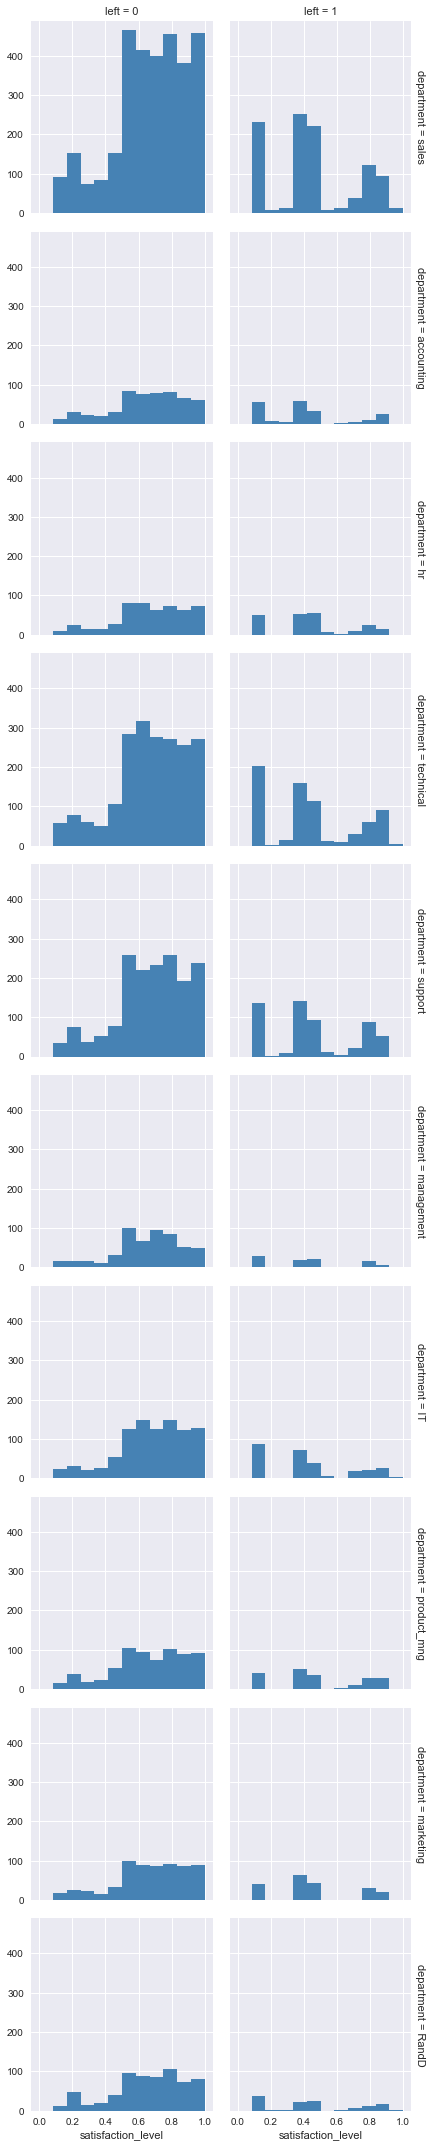

In [21]:
sns.set(style="darkgrid")
g = sns.FacetGrid(data, row="department", col="left", margin_titles=True)
bins = np.linspace(0, 1, 13)
g.map(plt.hist, "satisfaction_level", color="steelblue", bins=bins, lw=0)

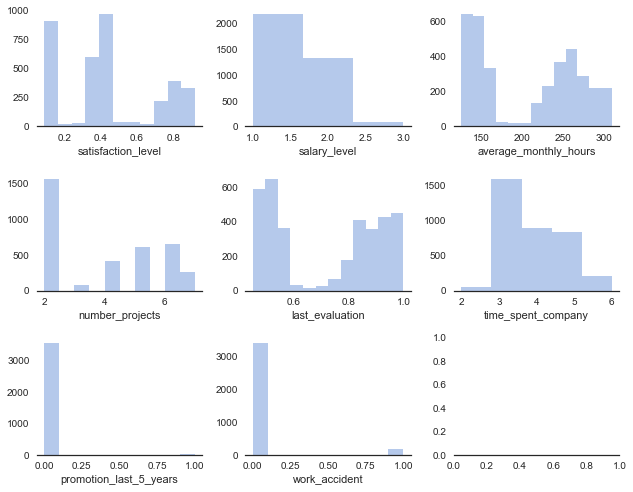

In [22]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9,7))
sns.despine(left=True)

#people that left
leavers = data.loc[data['left'] == 1]

# Plot a simple histogram with binsize determined automatically
sns.distplot(leavers['satisfaction_level'], kde=False, color="b", ax=axes[0,0])
sns.distplot(leavers['salary_level'], bins=3, kde=False, color="b", ax=axes[0, 1])
sns.distplot(leavers['average_monthly_hours'], kde=False, color="b", ax=axes[0, 2])
sns.distplot(leavers['number_projects'], kde=False, color="b", ax=axes[1,0])
sns.distplot(leavers['last_evaluation'], kde=False, color="b", ax=axes[1, 1])
sns.distplot(leavers['time_spent_company'], kde=False, bins=5, color="b", ax=axes[1, 2])
sns.distplot(leavers['promotion_last_5_years'],bins=10, kde=False, color="b", ax=axes[2,0])
sns.distplot(leavers['work_accident'], bins=10,kde=False, color="b", ax=axes[2, 1])


plt.tight_layout()

In [23]:
print("So, from the plots we can see that most of the employees that left the company left because of thefoloowing reasons -:\n1.salary average_montly_hours \n2.satisfaction_level\n3.last_evaluation")

So, from the plots we can see that most of the employees that left the company left because of thefoloowing reasons -:
1.salary average_montly_hours 
2.satisfaction_level
3.last_evaluation


In [51]:
df = pd.DataFrame(data)
df2 = pd.get_dummies(df['salary'], prefix="salary", prefix_sep="_", drop_first=True)
#df2=pd.get_dummies(df,columns=['salary'])
# df2.dtypes
# df2.head()
df3 = pd.concat([df,df2], axis=1)
df3.drop('salary', axis=1, inplace=True)
df3.drop('department', axis=1, inplace=True)
df3.drop('name', axis=1, inplace=True)
df3.head(1000)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,1,0
1,0.80,0.86,5,262,6,0,1,0,2,0,1
2,0.11,0.88,7,272,4,0,1,0,2,0,1
3,0.72,0.87,5,223,5,0,1,0,1,1,0
4,0.37,0.52,2,159,3,0,1,0,1,1,0
5,0.41,0.50,2,153,3,0,1,0,1,1,0
6,0.10,0.77,6,247,4,0,1,0,1,1,0
7,0.92,0.85,5,259,5,0,1,0,1,1,0
8,0.89,1.00,5,224,5,0,1,0,1,1,0
9,0.42,0.53,2,142,3,0,1,0,1,1,0


In [52]:
X = df3.loc[:, df3.columns != 'left']
Y = df3.loc[:, df3.columns == 'left']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
X_train.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,promotion_last_5_years,salary_level,salary_low,salary_medium
14404,0.09,0.82,6,249,4,0,0,2,0,1
2157,0.67,0.54,2,141,2,0,0,1,1,0
4249,0.95,0.81,3,260,2,0,0,1,1,0
13811,0.95,0.75,4,151,3,0,0,2,0,1
5625,0.64,0.57,3,179,3,0,0,2,0,1


In [53]:
clf = RandomForestClassifier()

In [54]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [55]:
pred = clf.predict(X_test)

In [56]:
acc = accuracy_score(Y_test, pred)

In [57]:
print("Accuracy of the algorithm: ", acc)
print("Total number of employees which are likely to leave: ", sum(pred))

Accuracy of the algorithm:  0.990222222222
Total number of employees which are likely to leave:  1061


In [63]:
df4 = df3[df3['left']==0]
df4.head()
#df4.drop('left', axis=1, inplace=True)
#df4.head()
# a = df4.values

# prob = clf.predict_proba(a)
# #prob

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,salary_low,salary_medium
2000,0.58,0.74,4,215,3,0,0,0,1,1,0
2001,0.82,0.67,2,202,3,0,0,0,1,1,0
2002,0.45,0.69,5,193,3,0,0,0,1,1,0
2003,0.78,0.82,5,247,3,0,0,0,1,1,0
2004,0.49,0.60,3,214,2,0,0,0,1,1,0


In [ ]:
print('Number of employees that will definitely leave: ', sum(prob[:, 1]==1))

In [ ]:
df4['SoonLeave'] = prob[:, 1]
df4[df4['SoonLeave'] > 0.5]

In [ ]:
soonleave = sum(prob[:, 1] > 0.5)
soonleave
print('So, ' + str(soonleave) + ' employees will soon leave the company.')